In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [609]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


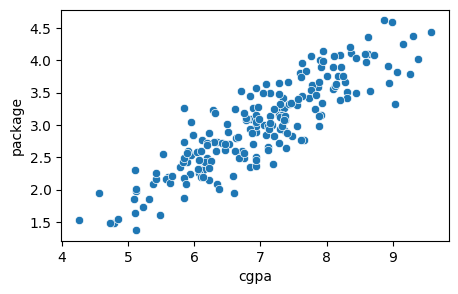

In [610]:
plt.figure(figsize=(5, 3))
sns.scatterplot(df, x="cgpa", y="package")
plt.show()

In [611]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [612]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

In [613]:
from sklearn.linear_model import LinearRegression

In [614]:
lr = LinearRegression()

In [615]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


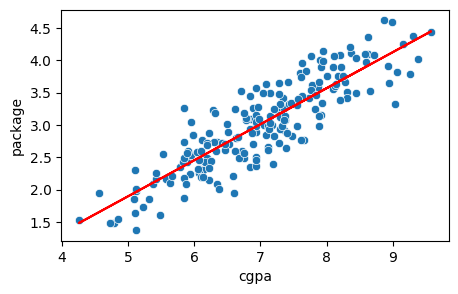

In [616]:
plt.figure(figsize=(5, 3))
sns.scatterplot(df, x="cgpa", y="package")
plt.plot(X_train, lr.predict(X_train), color="red")

### Applying metrics

In [617]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### You just have to give them the y_test and y_pred

In [618]:
y_pred = lr.predict(X_test)

#### MAE

In [619]:
print("mae =", mean_absolute_error(y_test, y_pred))

mae = 0.2884710931878175


#### MSE

In [620]:
print("mse =", mean_squared_error(y_test, y_pred))

mse = 0.12129235313495527


#### RMSE

In [621]:
print("rmse =", np.sqrt(mean_squared_error(y_test, y_pred)))

rmse = 0.34827051717731616


#### R2 Score

In [622]:
print("r2 score =", r2_score(y_test, y_pred))

r2 score = 0.780730147510384


#### Adjusted R2 Score

In [623]:
r2 = r2_score(y_test, y_pred)
X_test.shape

(40, 1)

In [624]:
adjR2 = 1 - ( ((1 - r2)*(40 - 1)) / (40 - 1 - 1) )
print("Adjusted R2 score =", adjR2)

Adjusted R2 score = 0.7749598882343415


### Now to check the use of adjusted r2 score. lets add a new irrelevant column

In [625]:
new_df= df.copy()
new_df["random_feature"] = np.random.random(200)
new_df.head()

,cgpa,package,random_feature
0,6.89,3.26,0.865579
1,5.12,1.98,0.198103
2,7.82,3.25,0.166761
3,7.42,3.67,0.096151
4,6.94,3.57,0.363628


In [626]:
new_df = new_df[["cgpa", "random_feature", "package"]]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.865579,3.26
1,5.12,0.198103,1.98
2,7.82,0.166761,3.25
3,7.42,0.096151,3.67
4,6.94,0.363628,3.57


#### Now we have two input columns - ***cgpa*** and ***random_feature*** and one output - ***package***

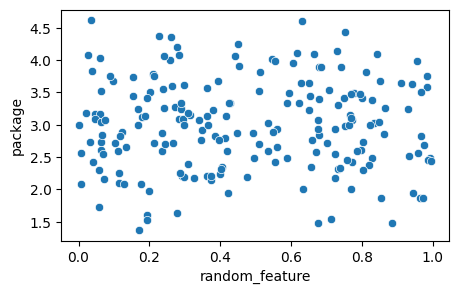

In [627]:
plt.figure(figsize=(5, 3))
sns.scatterplot(new_df, x="random_feature", y="package")
plt.show()

In [628]:
X = new_df.iloc[:, 0:2]
y = new_df.iloc[:, -1]

In [629]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

In [630]:
from sklearn.linear_model import LinearRegression

In [631]:
lr = LinearRegression()

In [632]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [633]:
y_pred1 = lr.predict(X_test)

In [634]:
print("R2 score after addition of irrelevant column =", r2_score(y_test, y_pred1))

R2 score after addition of irrelevant column = 0.7811341399512971


#### Look the r2 score has increased which is inappropriate

#### Now lets see adjusted r2 score

In [635]:
r2 = r2_score(y_test, y_pred1)
X_test.shape

(40, 2)

In [636]:
adjR2 = 1 - ( ((1 - r2)*(40 - 1)) / (40 - 1 - 2) )
print("Adjusted R2 score after addition of irrelevant column =", adjR2)

Adjusted R2 score after addition of irrelevant column = 0.7693035529216374


### Now lets add a relevant column

In [637]:
new_df2 = df.copy()

new_df2["iq"] = new_df2["package"] + (np.random.randint(-12, 12, 200)/10)

new_df2 = new_df2[["cgpa", "iq", "package"]]

new_df2.head()

,cgpa,iq,package
0,6.89,4.36,3.26
1,5.12,0.98,1.98
2,7.82,4.25,3.25
3,7.42,3.07,3.67
4,6.94,4.27,3.57


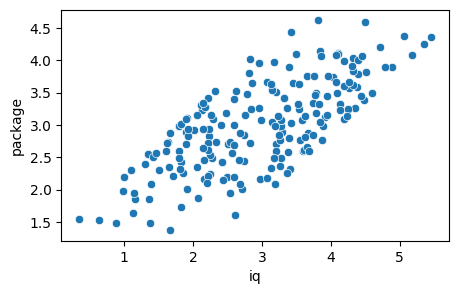

In [638]:
plt.figure(figsize=(5, 3))
sns.scatterplot(new_df2, x="iq", y="package")
plt.show()

In [639]:
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]

In [640]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

In [641]:
from sklearn.linear_model import LinearRegression

In [642]:
lr = LinearRegression()

In [643]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [644]:
y_pred2 = lr.predict(X_test)

In [645]:
print("R2 score after addition of a relevant column =", r2_score(y_test, y_pred2))

R2 score after addition of a relevant column = 0.8249182167811426


#### Look r2 score has increased

In [646]:
r2 = r2_score(y_test, y_pred2)
X_test.shape

(40, 2)

In [647]:
adjR2 = 1 - ( ((1 - r2)*(40 - 1)) / (40 - 1 - 2) )
print("Adjusted R2 score after addition of relevant column =", adjR2)

Adjusted R2 score after addition of relevant column = 0.8154543366071503
